# Getting the Data-Analysis workbench ready

## Loading Data-Analysis tools

## Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [1]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In [18]:
# Now we load the TF bhsa database
OT = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')

The requested data is not available offline
	~/text-fabric-data/etcbc/bhsa/tf not found
rate limit is 5000 requests per hour, with 5000 left for this hour
	connecting to online GitHub repo etcbc/bhsa ... connected
	downloading https://github.com/ETCBC/bhsa/releases/download/v1.7.3/tf-2021.zip ... 
	unzipping ... 
	saving data


This is Text-Fabric 9.3.1
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

131 features found and 1 ignored
   |     3.23s T otype                from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |       33s T oslots               from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.01s T book@tr              from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.03s T qere_trailer         from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.00s T book@bn              from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.00s T book@fa              from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.00s T book@he              from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.01s T book@syc             from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.00s T book@da              from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.01s T book@fr              from ~/text-fabric-data/etcbc/bhsa/tf/2021
   |     0.01s T book@am              from ~/text-fabr

In [49]:
# Now we load the TF tisch database
NT = use('CenterBLC/NA', version=1904)

This is Text-Fabric 9.3.1
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

65 features found and 0 ignored
   |     0.98s T abc_order            from ~/text-fabric-data/CenterBLC/NA/tf/1904


## Loading data analysis tools

In [22]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Creating a Greek Dictionary

In [50]:
GreekDict = '''
word freq_lemma<10 gloss* lemma* abc_order*

'''
GreekDict  = NT.search(GreekDict)
NT.table(GreekDict, start=1, end=15, extraFeatures={}, condensed=False)

  0.32s 11082 results


n,p,word
1,Matthew 1:1,γενέσεως
2,Matthew 1:3,Φαρὲς
3,Matthew 1:3,Ζαρὰ
4,Matthew 1:3,"Θάμαρ,"
5,Matthew 1:3,Φαρὲς
6,Matthew 1:3,"Ἐσρώμ,"
7,Matthew 1:3,Ἐσρὼμ
8,Matthew 1:3,"Ἀράμ,"
9,Matthew 1:4,Ἀρὰμ
10,Matthew 1:4,"Ἀμιναδάβ,"


There is a total of 15 words in John 3 that appear less frequent than 10x. In order to produce a Vocab List we have to export our search results. How to do this, we will learn in one of our next notebooks... ;-)

## Creating a Vocab List

In [51]:
NT.export(GreekDict, toDir='D:\OneDrive - Andrews UniversityP0_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export', toFile='GreekDict.tsv')

In [35]:
GreekDict=pd.read_csv('D:\OneDrive - Andrews UniversityP0_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export/GreekDict.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
GreekDict

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,abc_order1,freq_lemma1,gloss1,lemma1
0,1,Matthew,1,1,2,word,γενέσεως,1067,5,"birth, lineage",γένεσις
1,2,Matthew,1,3,31,word,Φαρὲς,5116,3,Perez,Φάρες
2,3,Matthew,1,3,34,word,Ζαρὰ,2173,1,Zerah,Ζάρα
3,4,Matthew,1,3,37,word,"Θάμαρ,",2251,1,Tamar,Θαμάρ
4,5,Matthew,1,3,38,word,Φαρὲς,5116,3,Perez,Φάρες
...,...,...,...,...,...,...,...,...,...,...,...
11077,11078,Revelation,22,15,137640,word,εἰδωλολάτραι,1482,7,worshipper of image,εἰδωλολάτρης
11078,11079,Revelation,22,16,137670,word,"λαμπρός,",2946,9,"shining, magnificent, bright",λαμπρός
11079,11080,Revelation,22,16,137672,word,πρωϊνός.,4223,2,belonging to the morning,πρωϊνός
11080,11081,Revelation,22,17,137678,word,νύμφη,3396,8,"bride, daughter-in-law",νύμφη


In [36]:
GreekDict = GreekDict[['lemma1', 'gloss1', 'freq_lemma1', 'abc_order1']]
GreekDict

,lemma1,gloss1,freq_lemma1,abc_order1
0,γένεσις,"birth, lineage",5,1067
1,Φάρες,Perez,3,5116
2,Ζάρα,Zerah,1,2173
3,Θαμάρ,Tamar,1,2251
4,Φάρες,Perez,3,5116
...,...,...,...,...
11077,εἰδωλολάτρης,worshipper of image,7,1482
11078,λαμπρός,"shining, magnificent, bright",9,2946
11079,πρωϊνός,belonging to the morning,2,4223
11080,νύμφη,"bride, daughter-in-law",8,3396


In [37]:
GreekDict = GreekDict.drop_duplicates().sort_values(by='abc_order1', ascending=[True])
GreekDict

,lemma1,gloss1,freq_lemma1,abc_order1
1877,Ἀαρών,Aaron,5,1
10658,Ἀβαδδών,Abaddon,1,2
7337,ἀβαρής,not burdensome,1,3
1721,ἀββά,Father,3,4
903,Ἅβελ,Abel,4,5
...,...,...,...,...
6883,ὡσπερεί,"just as if, as it were",1,5395
1730,ὠτάριον,ear,2,5397
1029,ὠτίον,ear,3,5398
5973,ὠφέλεια,"usefulness, profit, advantage",2,5399


## Exporting our List and Post-Production
Now we can export this result into spreadsheet file and print it of for our students.

In [14]:
GreekDict.to_excel('D:\OneDrive - Andrews University\1200_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export/GreekDictFinal.xlsx')

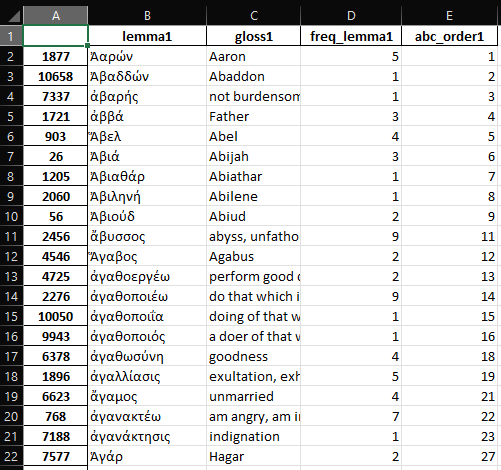

# Creating a Hebrew Vocablist for students

## Searching for all words that appear less than 100 times in Esther 6

In [40]:
VocabListEsther6 = '''
book book=Esther
    chapter chapter=6
        word freq_lex<100 gloss* bol_dict_HebArm* bol_dict_EN* bol_dict_abc*
'''
VocabListEsther6  = OT.search(VocabListEsther6)
OT.table(VocabListEsther6, start=1, end=15, extraFeatures={'freq_lex', 'bol_dict_HebArm', 'bol_dict_EN', 'bol_dict_abc','gloss'}, condensed=False)

  1.96s 74 results


n,p,book,chapter,word
1,Esther 6:1,Esther,Esther 6,נָדְדָ֖ה
2,Esther 6:1,Esther,Esther 6,שְׁנַ֣ת
3,Esther 6:1,Esther,Esther 6,זִּכְרֹנֹות֙
4,Esther 6:2,Esther,Esther 6,מָרְדֳּכַ֜י
5,Esther 6:2,Esther,Esther 6,בִּגְתָ֣נָא
6,Esther 6:2,Esther,Esther 6,תֶ֗רֶשׁ
7,Esther 6:2,Esther,Esther 6,סָרִיסֵ֣י
8,Esther 6:2,Esther,Esther 6,סַּ֑ף
9,Esther 6:2,Esther,Esther 6,אֲחַשְׁוֵרֹֽושׁ׃
10,Esther 6:3,Esther,Esther 6,יְקָ֧ר


## Creating a Vocab List

In [41]:
OT.export(VocabListEsther6, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='VocabListEsther6.tsv')

In [42]:
VocabListEsther6=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/VocabListEsther6.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VocabListEsther6

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,chapter2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,bol_dict_abc3,freq_lex3,gloss3
0,1,Esther,6,1,426624,book,Esther,427454,chapter,6,367942,word,נָדְדָ֖ה,"qal: run away, flee; wander; flutter (wings); ...",נדד,4943,27,flee
1,2,Esther,6,1,426624,book,Esther,427454,chapter,6,367943,word,שְׁנַ֣ת,sleep,שֵׁנָה II,7899,23,sleep
2,3,Esther,6,1,426624,book,Esther,427454,chapter,6,367953,word,זִּכְרֹנֹות֙,reminder,זִכָּרֹון,2040,24,remembrance
3,4,Esther,6,2,426624,book,Esther,427454,chapter,6,367969,word,מָרְדֳּכַ֜י,Mordecai,מָרְדְּכַי,4651,60,Mordecai
4,5,Esther,6,2,426624,book,Esther,427454,chapter,6,367971,word,בִּגְתָ֣נָא,Bigthana,בִּגְתָן,858,2,Bigthana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,Esther,6,14,426624,book,Esther,427454,chapter,6,368319,word,סָרִיסֵ֥י,"court-official, eunuch",סָרִיס,5489,45,official
70,71,Esther,6,14,426624,book,Esther,427454,chapter,6,368324,word,יַּבְהִ֨לוּ֙,ni: be terrified; pi: terrify; hasten; be in h...,בהל,879,39,disturb
71,72,Esther,6,14,426624,book,Esther,427454,chapter,6,368328,word,הָמָ֔ן,Haman,הָמָן II,1897,54,Haman
72,73,Esther,6,14,426624,book,Esther,427454,chapter,6,368331,word,מִּשְׁתֶּ֖ה,(drinking-) feast,מִשְׁתֶּה,4815,46,drinking


In [44]:
VocabListEsther6 = VocabListEsther6[['bol_dict_HebArm3', 'bol_dict_EN3', 'freq_lex3', 'bol_dict_abc3']]
VocabListEsther6.head(15)

,bol_dict_HebArm3,bol_dict_EN3,freq_lex3,bol_dict_abc3
0,נדד,"qal: run away, flee; wander; flutter (wings); ...",27,4943
1,שֵׁנָה II,sleep,23,7899
2,זִכָּרֹון,reminder,24,2040
3,מָרְדְּכַי,Mordecai,60,4651
4,בִּגְתָן,Bigthana,2,858
5,תֶּרֶשׁ,Teresh,2,8506
6,סָרִיס,"court-official, eunuch",45,5489
7,סַף II,threshold,25,5447
8,אֲחַשְׁוֵרֹושׁ,Xerxes,31,311
9,יְקָר II,"preciousness; honoring, esteeming",17,3244


In [45]:
VocabListEsther6Final = VocabListEsther6.drop_duplicates().sort_values('bol_dict_abc3', ascending=[True])
VocabListEsther6Final

,bol_dict_HebArm3,bol_dict_EN3,freq_lex3,bol_dict_abc3
61,אָבֵל IV,in mourning,8,57
8,אֲחַשְׁוֵרֹושׁ,Xerxes,31,311
73,אֶסְתֵּר,Esther,55,610
4,בִּגְתָן,Bigthana,2,858
70,בהל,ni: be terrified; pi: terrify; hasten; be in h...,39,879
10,גְּדוּלָּה,greatness,12,1342
60,דחף,"qal: hasten; ni: hasten onseself, hurry;",4,1679
13,הָמָן II,Haman,54,1897
2,זִכָּרֹון,reminder,24,2040
64,זֶרֶשׁ,Zeresh,4,2131


## Exporting our List and Post-Production
Now we can export this result into spreadsheet file and print it of for our students.

In [47]:
VocabListEsther6Final.to_excel('D:\OneDrive - Andrews UniversityP0_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export/VocabListEsther6Final.xlsx')

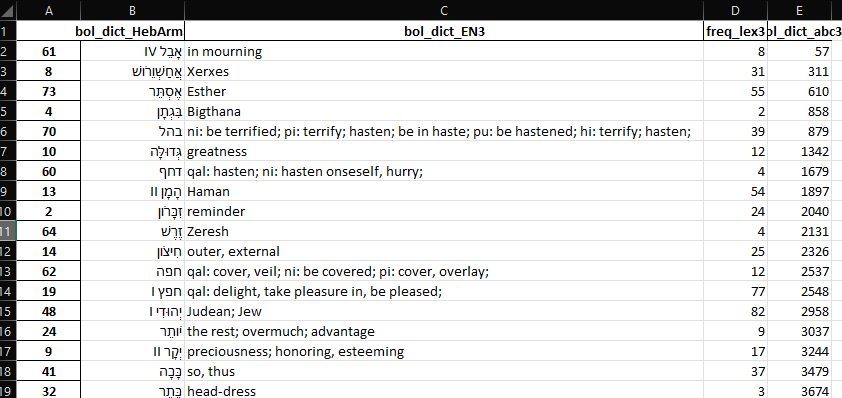

# Assignments
Create your own Vocab List on a passage you select.

# Whats Next?: Complex Query building
1. We will learn the basic architecture of the BHS and the Tischendorf database.
2. Understanding the database better will allow us to build sophisticated queries, including syntax queries...